<a href="https://colab.research.google.com/github/Augustswang/Courseactivity/blob/main/ElaheJ_DuPontAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import requests
import pandas as pd
myAPIKey = 'c21965ffbbeaa2eb1bb1b2bce999a80c'

stock = 'TSLA'
balanceStatements = requests.get(f"https://financialmodelingprep.com/api/v3/balance-sheet-statement/{stock}?apikey={myAPIKey}").json()

incomeStatements = requests.get(f'https://financialmodelingprep.com/api/v3/income-statement/{stock}?apikey={myAPIKey}').json()



In [6]:
print (balanceStatements[:5])

[{'date': '2021-12-31', 'symbol': 'TSLA', 'reportedCurrency': 'USD', 'cik': '0001318605', 'fillingDate': '2022-02-07', 'acceptedDate': '2022-02-04 20:11:27', 'calendarYear': '2021', 'period': 'FY', 'cashAndCashEquivalents': 17576000000, 'shortTermInvestments': 131000000, 'cashAndShortTermInvestments': 17707000000, 'netReceivables': 1913000000, 'inventory': 5757000000, 'otherCurrentAssets': 1723000000, 'totalCurrentAssets': 27100000000, 'propertyPlantEquipmentNet': 31176000000, 'goodwill': 200000000, 'intangibleAssets': 1517000000, 'goodwillAndIntangibleAssets': 1717000000, 'longTermInvestments': 0.0, 'taxAssets': 0.0, 'otherNonCurrentAssets': 2138000000, 'totalNonCurrentAssets': 35031000000, 'otherAssets': 0.0, 'totalAssets': 62131000000, 'accountPayables': 10025000000, 'shortTermDebt': 1589000000, 'taxPayables': 1122000000, 'deferredRevenue': 2372000000, 'otherCurrentLiabilities': 5719000000, 'totalCurrentLiabilities': 19705000000, 'longTermDebt': 5245000000, 'deferredRevenueNonCurren

In [7]:
twoYearBalanceStatement = balanceStatements[:2]
twoYearIncomeStatement = incomeStatements[:2]

In [55]:
profitability=[]
assetTurnOver=[]
capitalStructure=[]
returnOnEquity=[]

dates=[]

for i in range (0,2):
  dates.append(twoYearBalanceStatement[i]['date'])
  profitabilityValue = twoYearIncomeStatement[i]['netIncome']/twoYearIncomeStatement[i]['revenue']
  profitability.append(profitabilityValue)
  assetTurnOverValue = twoYearIncomeStatement[i]['revenue']/twoYearBalanceStatement[i]['totalAssets']
  assetTurnOver.append(assetTurnOverValue)
  capitalStructureValue = twoYearBalanceStatement[i]['totalAssets']/twoYearBalanceStatement[i]['totalStockholdersEquity']
  capitalStructure.append(capitalStructureValue)
  returnOnEquityValue = profitabilityValue*assetTurnOverValue*capitalStructureValue
  returnOnEquity.append(returnOnEquityValue)

 

In [11]:
print(returnOnEquity)

[0.1828149325913412, 0.03104611923509561]


In [59]:
import pandas as pd

DupontDF = pd.DataFrame(columns=['date', 'profitability', 'assetTurnOver', 'capitalStructure', 'returnOnEquity'])
DupontDF['date'] = dates 
DupontDF['profitability']=profitability
DupontDF['assetTurnOver']=assetTurnOver
DupontDF['capitalStructure']=capitalStructure
DupontDF['returnOnEquity']=returnOnEquity

print(DupontDF)

         date  profitability  assetTurnOver  capitalStructure  returnOnEquity
0  2021-12-31        0.10254       0.866283          2.058068        0.182815
1  2020-12-31        0.02188       0.604740          2.346367        0.031046


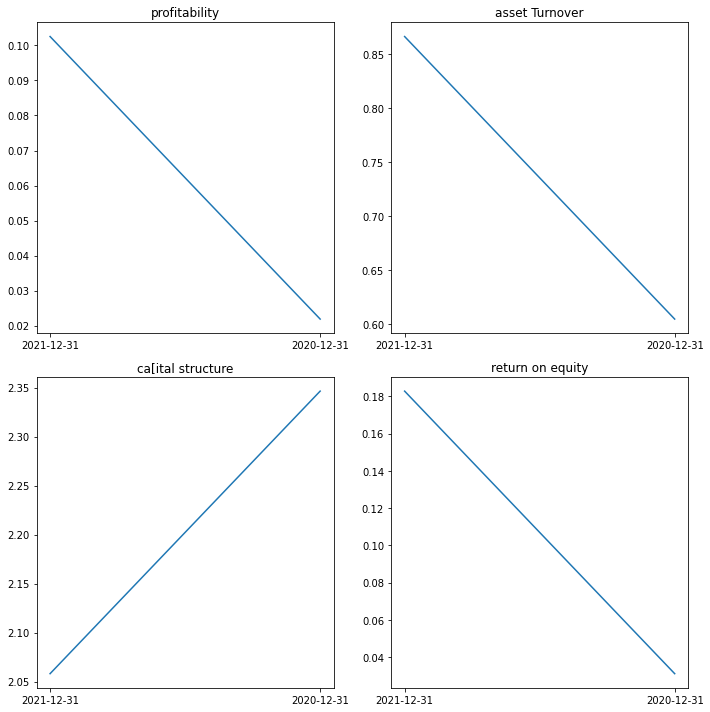

In [60]:
from IPython.core.pylabtools import figsize
from datetime import datetime
import matplotlib.pyplot as plt


fig,axs= plt.subplots(2,2, figsize=(10,10))
x=DupontDF['date']  

axs[0,0].plot(x,DupontDF['profitability'])
axs[0,0].set_title('profitability')

axs[0,1].plot(x,DupontDF['assetTurnOver'])
axs[0,1].set_title('asset Turnover')

axs[1,0].plot(x,DupontDF['capitalStructure'])
axs[1,0].set_title('ca[ital structure')

axs[1,1].plot(x,DupontDF['returnOnEquity'])
axs[1,1].set_title('return on equity')
fig.tight_layout()




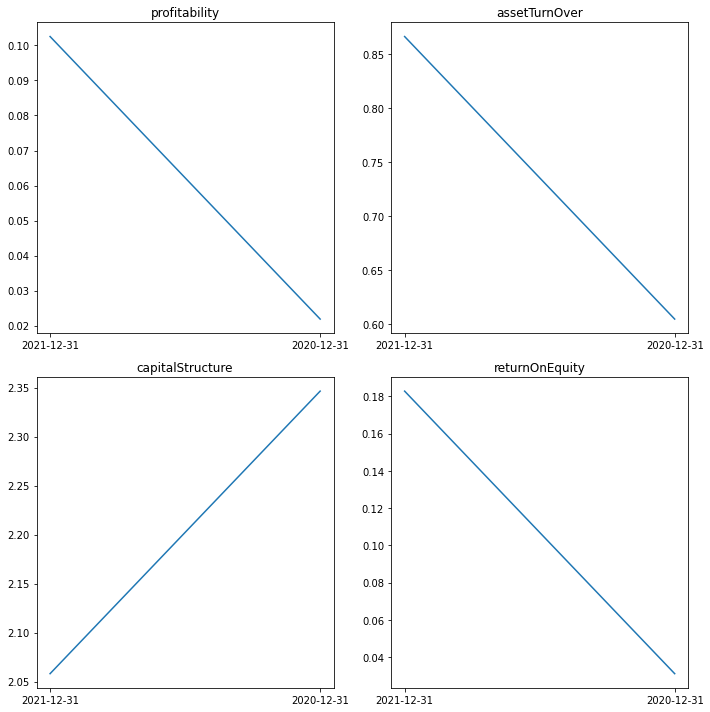

In [61]:
fig,axs= plt.subplots(2,2, figsize=(10,10))
x=DupontDF['date'] 
values=['profitability', 'assetTurnOver', 'capitalStructure', 'returnOnEquity']
for i in range(0,2):
  for j in range(0,2):
    valueIndex=i*2+j
    axs[i,j].plot (x,DupontDF[values[valueIndex]])
    axs[i,j].set_title(values[valueIndex])

fig.tight_layout()